In [52]:
import os
import SpuBase
from SpuBase.data_access import Particles
import pandas as pd

# Initialize SpuBase

In [40]:
os.chdir(os.path.join(os.path.dirname(SpuBase.__file__)))

In [41]:
SpuBase = Particles(verbose=True, show_plot=False)  # create object (acts as 'self' and is used to call globals)

Model: sbbx
Sulfur diffusion: True
SW fraction is 96% H+ and 4% He2+
DB directory: /mnt/c/Users/couro/Dokumente/GitHub/SpuBase/SpuBase


#### Data

In [42]:
oxide_comp_df = pd.read_csv('input/Lunar_compositions.csv', index_col='sample')
SpuBase.casename = oxide_comp_df.index.tolist()[0]  # for demonstration purposes we only run the first composition

#### Optional Inputs

In [43]:
# SpuBase.update_file_format('pdf') # plot format, choose between 'pdf', 'png', 'svg', 'tiff'
# impactor = 'SW' # either 1 keV H ('H'), 4 keV He ('He') or default: both ('SW')
# SpuBase.update_impactor(impactor, comp_frac=[0.96, 0.04])  # different mixture of H, He (Significantly effects yield and angular distribution!)
# SpuBase.v_esc = 2380 # m/s  escape velocity of irradiated body
# SpuBase.return_amu_ion = True  # plot total mass yield in amu/ion instead of atomic yields
# SpuBase.isSummedUp = False  # return result for each individual species separately
# SpuBase.sulfur_diffusion = False  # turns S diffusion in sulfides off

#### Change ouput directory to DATABASE/output/casename

In [44]:
SpuBase.update_directory()

Directory already exists:
/mnt/c/Users/couro/Dokumente/GitHub/SpuBase/SpuBase/output/Mare Basalt


#### Get mineral composition with CIPW norm

In [45]:
SpuBase.update_directory()  #creates a directory in output/SpuBase.casename

at_l = oxide_comp_df.columns.tolist()
at_frac = oxide_comp_df.loc[SpuBase.casename].tolist()

minfrac_molar = SpuBase.cipw_norm(at_l, at_frac)

SpuBase.surfcomp()

Directory already exists:
/mnt/c/Users/couro/Dokumente/GitHub/SpuBase/SpuBase/output/Mare Basalt
Composition given as oxides: False
Composition with > 47 % oxygen - at% assumed
Transition metals are attributed to Sulfur (3.87e-05)

Weight fractions:
         frac
Ab   0.032804
Abd  0.000031
An   0.264417
Chr  0.000046
Di   0.250119
En   0.114016
Fs   0.118137
Ilm  0.202544
Or   0.000039
Qz   0.017824
Tro  0.000023
Total: 1.00

Molar fractions
          frac
Or   0.000024
Ab   0.021311
An   0.161231
Di   0.195932
En   0.192660
Fs   0.151900
Chr  0.000035
Ilm  0.226476
Qz   0.050326
Tro  0.000044
Abd  0.000061
Total: 1.00
Sum of mineral fractions available in DataBase is 1.00/1.00



In [46]:
print('CIPW form:\n{}'.format(SpuBase.minfrac_df_weight_CIPW))

CIPW form:
          frac
Abd   0.000032
Chr   0.000047
Di    0.253940
Ilm   0.205638
Opx   0.235699
Or    0.000040
Plag  0.286485
Qz    0.018096
Tro   0.000023


In [47]:
SpuBase.dataseries()

Sum up particles from minerals and perform a re-fit
Process:
8.3% O
16.7% Na
25.0% Mg
33.3% Al
41.7% Si
50.0% Ti
58.3% K
66.7% Ca
75.0% Fe
83.3% Cr
91.7% S
100.0% Mn
Data exported as .csv to /mnt/c/Users/couro/Dokumente/GitHub/SpuBase/SpuBase/output/Mare Basalt/SW_Mare Basalt_refit_particle_data.txt
################# Data for Mare Basalt created  #################


#### Create DataFrame based on input

#### Plot data

######## Plotting yield ########


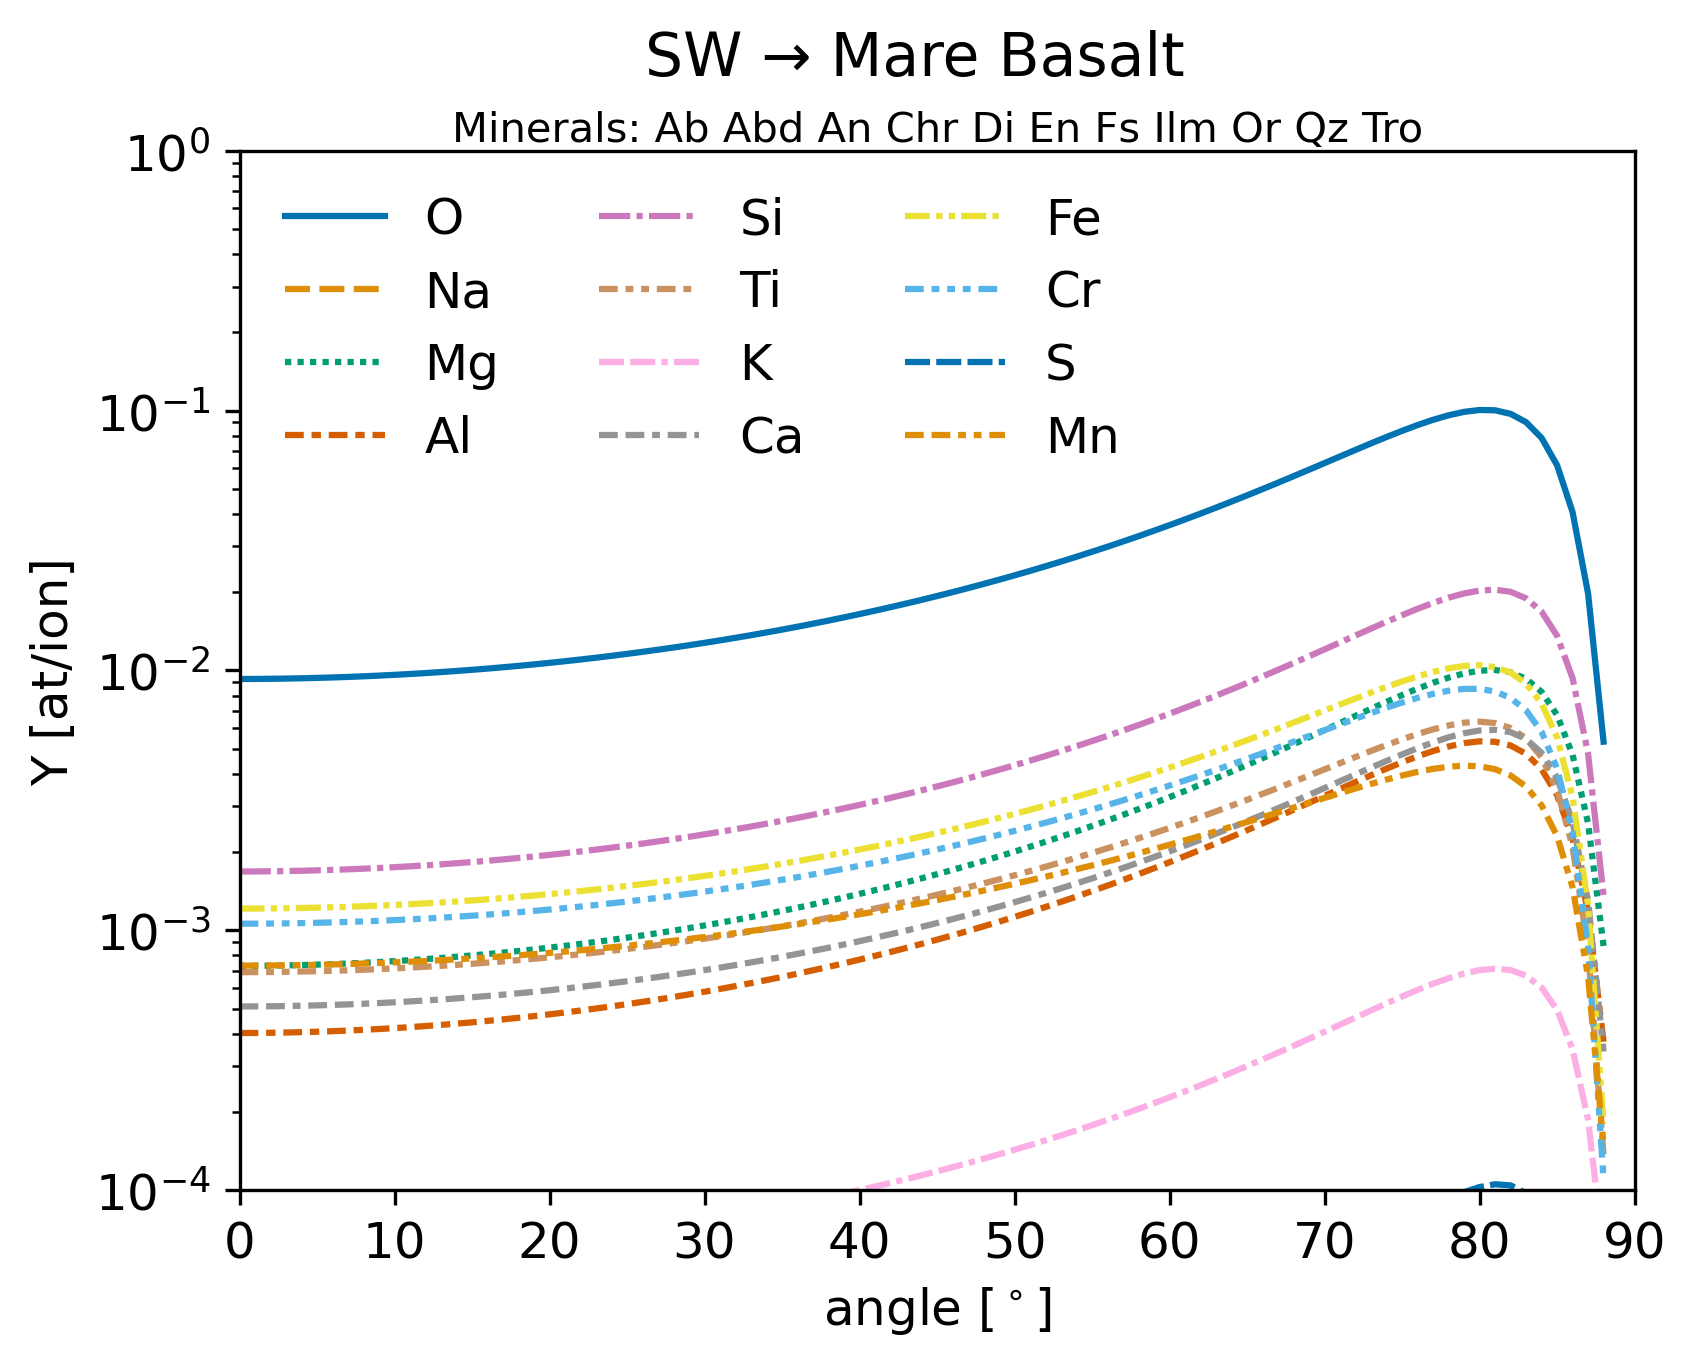

In [48]:
fig, ax = SpuBase.plot_yield()
fig

In [49]:
SpuBase.dist_angle = 45 # set distribution angle (default: 45°)
SpuBase.sputtered_particles_data()

######## Plotting angular distribution ########


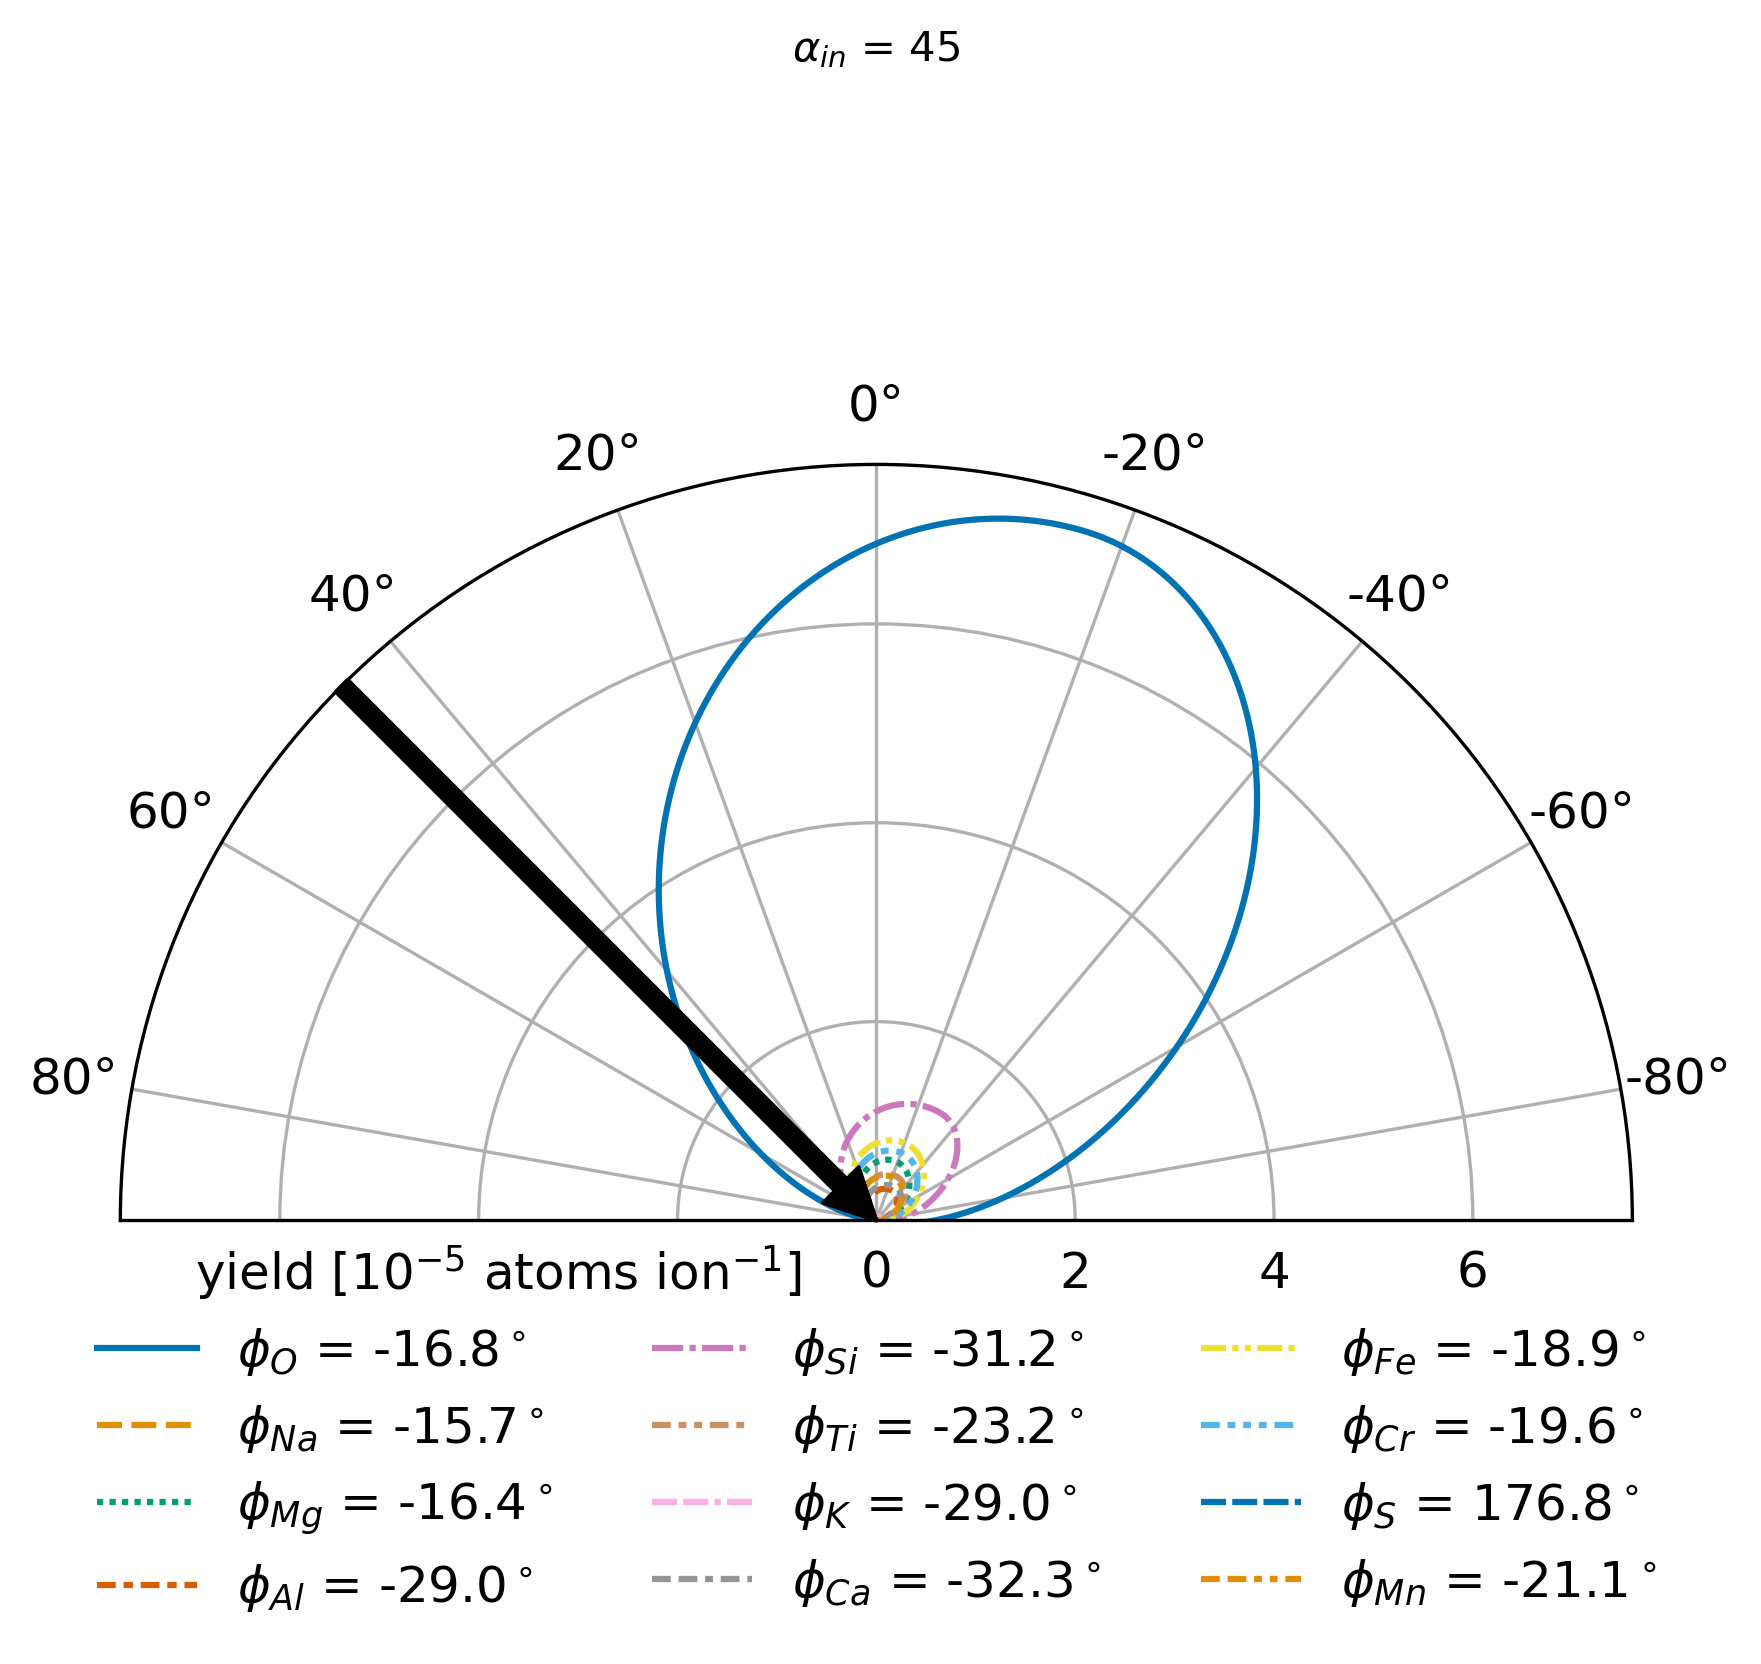

In [50]:
fig_adist, ax_adist = SpuBase.plot_dist('angular', minfrac_scaling=True, title='')
fig_adist

######## Plotting energy distribution ########


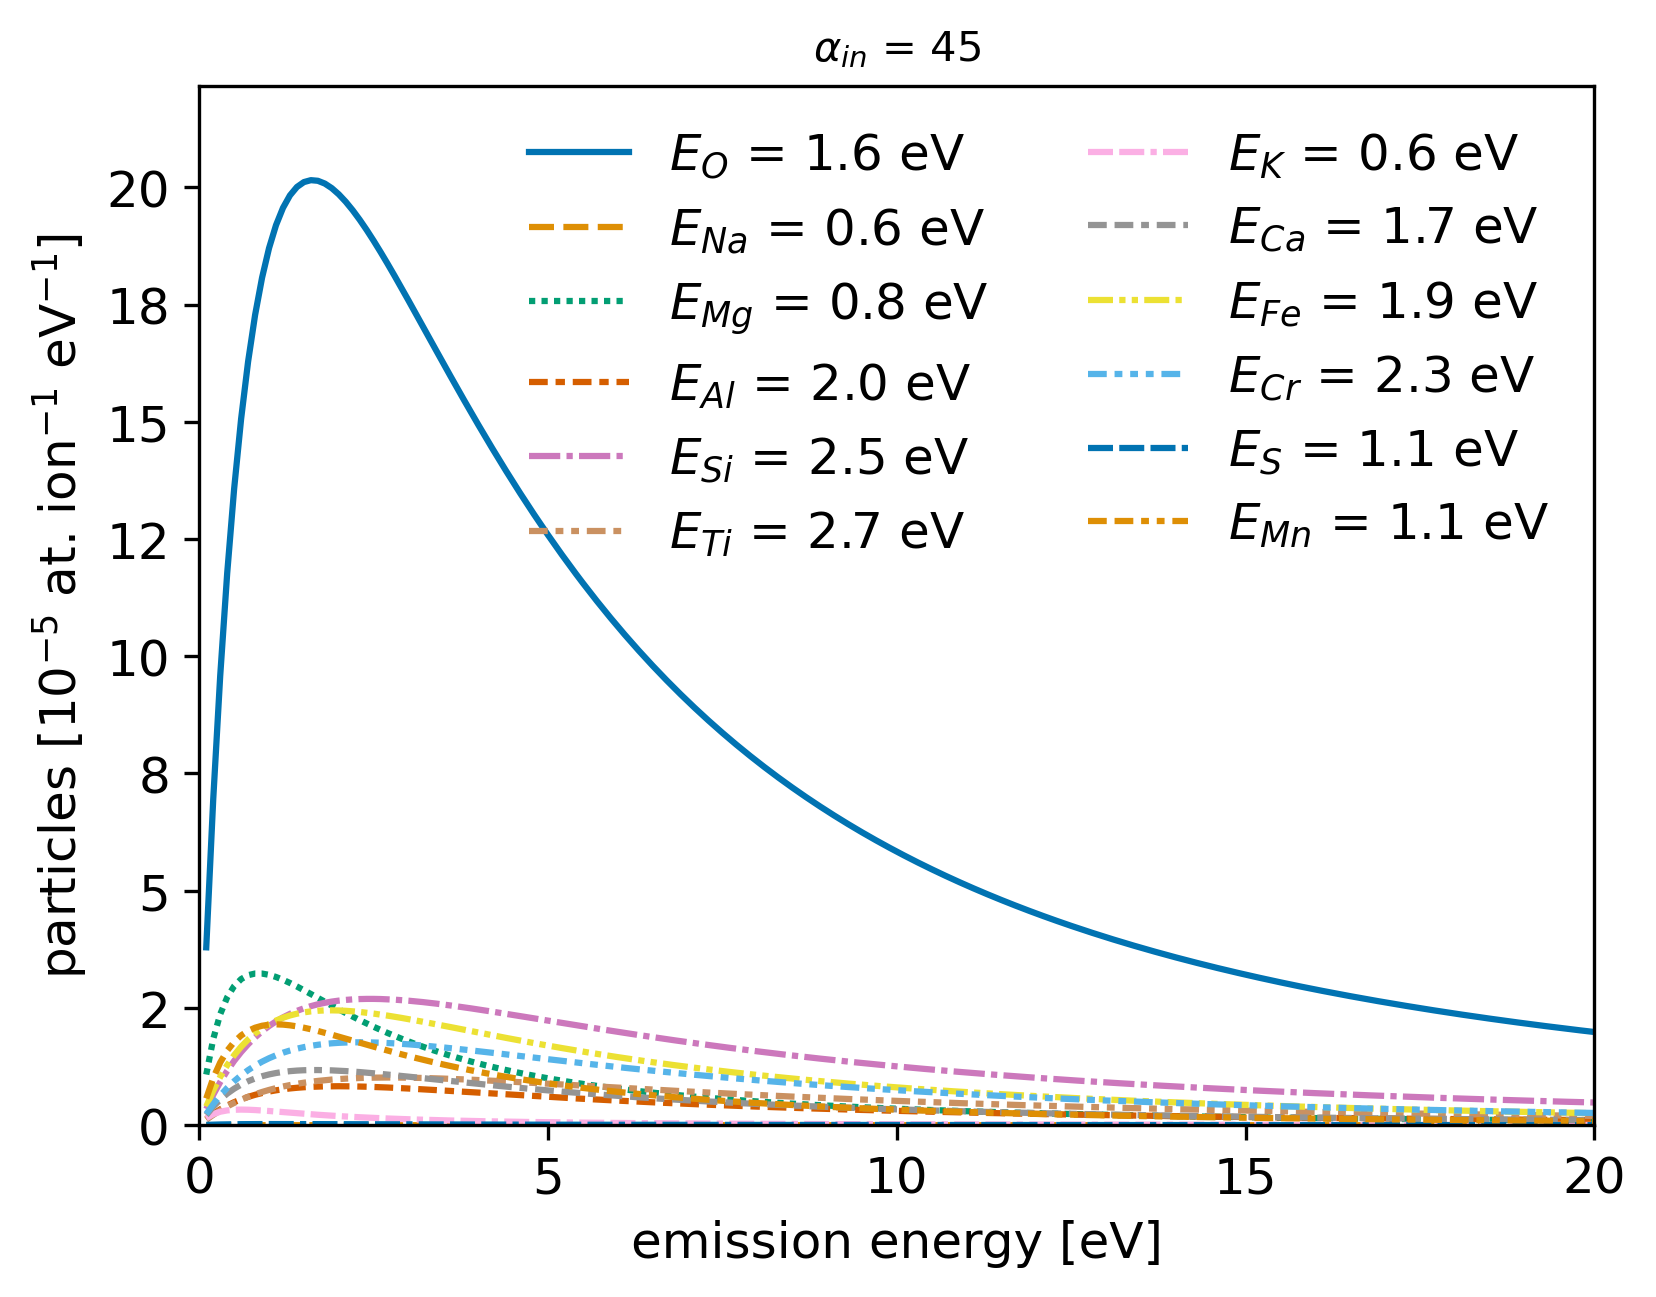

In [51]:
fig_edist, ax_edist = SpuBase.plot_dist('energy', minfrac_scaling=True, title='')
fig_edist